# 2-class classification

In [1]:
!pip install nengo

In [2]:
%matplotlib inline
import nengo
from nengo.dists import Uniform
from nengo.utils.ensemble import response_curves
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
def generateData(n):
    # n: iteration number
    xb = (np.random.rand(n)*2-1)/2+0.5
    yb = (np.random.rand(n)*2-1)/2+0.5
    xg = (np.random.rand(n)*2-1)/2-0.5
    yg = (np.random.rand(n)*2-1)/2-0.5
    
    inputs = []
    for i in range(len(xb)):
        inputs.append([xb[i],yb[i],[0,1]])
        inputs.append([xg[i],yg[i],[1,0]])
    return inputs

In [4]:
generateData(10)

[[0.5138157424300184, 0.5843246141510279, [0, 1]],
 [-0.4727113379259238, -0.22622806545324126, [1, 0]],
 [0.8250850282618761, 0.754938606040061, [0, 1]],
 [-0.29507798440040245, -0.5170171612594983, [1, 0]],
 [0.3800810929593703, 0.40733009265800046, [0, 1]],
 [-0.8386153344995678, -0.8198156606835486, [1, 0]],
 [0.6119962301360052, 0.784710995052171, [0, 1]],
 [-0.5443771390282772, -0.18461585538195469, [1, 0]],
 [0.9058377802038268, 0.4309338328873604, [0, 1]],
 [-0.6797464361726275, -0.8067697454566066, [1, 0]],
 [0.8238772733503337, 0.16161510529489376, [0, 1]],
 [-0.1203150336961325, -0.7447495506162507, [1, 0]],
 [0.34457492819029767, 0.9528877758221401, [0, 1]],
 [-0.7677671403524258, -0.3195866339269998, [1, 0]],
 [0.05708339671270435, 0.9597162929437761, [0, 1]],
 [-0.07285355728963006, -0.08585682322033616, [1, 0]],
 [0.8354600277569796, 0.08380027241457821, [0, 1]],
 [-0.8506294519823625, -0.4425960892634748, [1, 0]],
 [0.7764055580540691, 0.6898308625704286, [0, 1]],
 [-0.

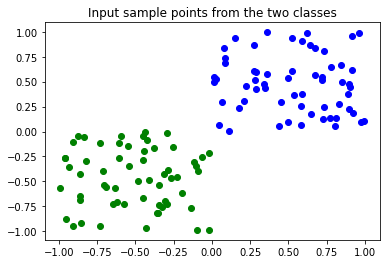

In [5]:
samples = 60
data = generateData(samples)
plt.figure()
plt.title("Input sample points from the two classes")
for x in data:
    if x[2][0] == 1:
        plt.plot(x[0], x[1], 'og')
    elif x[2][1] == 1:
        plt.plot(x[0], x[1], 'ob')
    else:
        plt.plot(x[0], x[1], 'om')

In [6]:
N = 500 #number of neurons
D_inp = 2
D_out = 2
sim_time = samples
model = nengo.Network('2-class Classification')
weights = np.random.randn(D_inp,D_out).transpose()  

with model:   
    def stim(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return [data[i][0], data[i][1]]
        return 0
    
        
    def stim_ans(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return data[i][2]
        return 0   
    
    
    #Define network inputs
    stim = nengo.Node(output=stim, size_out=D_inp)
    stim_ans = nengo.Node(output=stim_ans, size_out=D_out)
    
    #Create neural ensembles
    input = nengo.Ensemble(N*D_inp, dimensions=D_inp, label="input") 
    answer = nengo.Ensemble(N*D_out, dimensions=D_out, label="answer")
    correct_answer = nengo.Ensemble(N*D_out, dimensions=D_out, label="correct_answer") 
    
    #Provide inputs to the network
    nengo.Connection(stim, input) 
    nengo.Connection(stim_ans, correct_answer)
    
    #Compute error for learning
    error = nengo.Ensemble(N*D_out, dimensions=D_out, label="error")  
    nengo.Connection(answer, error, transform=1)
    nengo.Connection(correct_answer, error, transform=-1)
    
    conn = nengo.Connection(input, answer, transform=weights)
    # conn.learning_rule_type = nengo.PES(1e-4)

    # nengo.Connection(error, conn.learning_rule)  

In [7]:
with model:
    input_p = nengo.Probe(input, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)
    correct_answer_p = nengo.Probe(correct_answer, synapse=0.1)
    error_p = nengo.Probe(error, synapse=0.1)   

In [8]:
sim = nengo.Simulator(model)
sim.run(sim_time)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(50.0, 60.0)

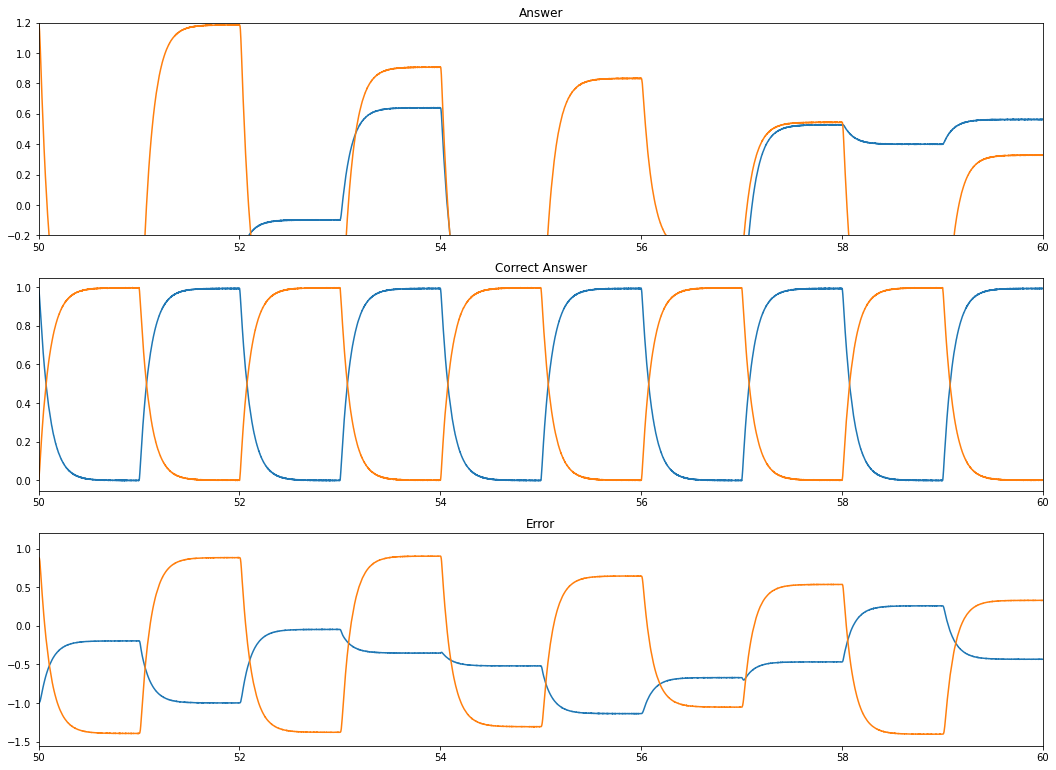

In [9]:
fig = plt.figure(figsize=(18,18))
p1 = fig.add_subplot(4,1,1)
p1.plot(t, sim.data[answer_p])
p1.set_title("Answer")
p1.set_xlim(int(samples)-10,sim_time)
p1.set_ylim(-0.2,1.2)

p2 = fig.add_subplot(4,1,2)
p2.plot(t, sim.data[correct_answer_p])
p2.set_title("Correct Answer")
p2.set_xlim(int(samples)-10,sim_time)

p3 = fig.add_subplot(4,1,3)
p3.plot(t, sim.data[error_p])
p3.set_title("Error")
p3.set_xlim(int(samples)-10,sim_time)

# 4-class classification

In [10]:
def generateData(n):
    xg = (np.random.rand(n)*2-1)/2-0.5
    yg = (np.random.rand(n)*2-1)/2+0.5
    xb = (np.random.rand(n)*2-1)/2+0.5
    yb = (np.random.rand(n)*2-1)/2-0.5
    xr = (np.random.rand(n)*2-1)/2-0.5
    yr = (np.random.rand(n)*2-1)/2-0.5
    xm = (np.random.rand(n)*2-1)/2+0.5
    ym = (np.random.rand(n)*2-1)/2+0.5
    
    inputs = []
    for i in range(len(xb)):
        inputs.append([xr[i],yr[i],[0,0,1,0]])
        inputs.append([xb[i],yb[i],[1,0,0,0]])
        inputs.append([xg[i],yg[i],[0,1,0,0]])
        inputs.append([xm[i],ym[i],[0,0,0,1]])
    return inputs


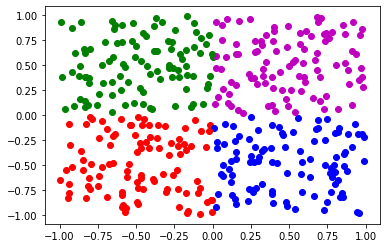

In [11]:
samples = 100
data = generateData(samples)


for x in data:
    if x[2][0] == 1:
        plt.plot(x[0], x[1], 'ob')
    elif x[2][1] == 1:
        plt.plot(x[0], x[1], 'og')
    elif x[2][2] == 1:
        plt.plot(x[0], x[1], 'or') 
    else:
        plt.plot(x[0], x[1], 'om')

In [16]:
N = 100 #number of neurons
D_inp = 2
D_out = 4
sim_time = samples
model = nengo.Network('4-class Classification')
weights = np.random.randn(D_inp,D_out).transpose()  

with model:   
    def stim(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return [data[i][0], data[i][1]]
        return 0
    
        
    def stim_ans(t):
        for i in range(samples):
            if int(t) % samples <= i:
                return data[i][2]
        return 0   
    
    
    #Define network inputs
    stim = nengo.Node(output=stim, size_out=D_inp)
    stim_ans = nengo.Node(output=stim_ans, size_out=D_out)
    
    #Create neural ensembles
    input = nengo.Ensemble(N*D_inp, dimensions=D_inp, label="input") 
    answer = nengo.Ensemble(N*D_out, dimensions=D_out, label="answer")
    correct_answer = nengo.Ensemble(N*D_out, dimensions=D_out, radius=2, label="correct_answer") 
    
    #Provide inputs to the network
    nengo.Connection(stim, input) 
    nengo.Connection(stim_ans, correct_answer)
    
    #Compute error for learning
    error = nengo.Ensemble(N*D_out, dimensions=D_out, label="error")  
    nengo.Connection(answer, error, transform=1)
    nengo.Connection(correct_answer, error, transform=-1)
    
    conn = nengo.Connection(input, answer, transform=weights) 

    # conn.learning_rule_type = nengo.PES(1e-4)
    # nengo.Connection(error, conn.learning_rule)  

In [17]:
with model:
    input_p = nengo.Probe(input, synapse=0.1)
    answer_p = nengo.Probe(answer, synapse=0.1)
    correct_answer_p = nengo.Probe(correct_answer, synapse=0.1)
    error_p = nengo.Probe(error, synapse=0.1)   

In [18]:
sim = nengo.Simulator(model)
sim.run(sim_time)
t = sim.trange()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(90.0, 100.0)

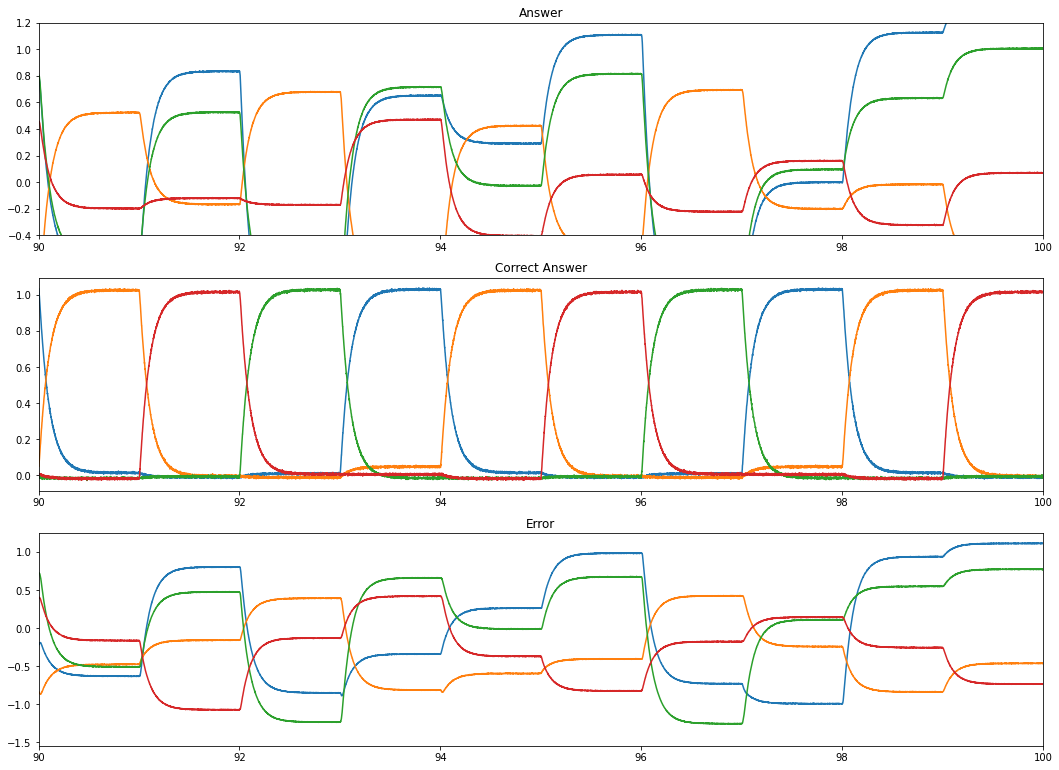

In [19]:
fig = plt.figure(figsize=(18,18))
p1 = fig.add_subplot(4,1,1)
p1.plot(t, sim.data[answer_p])
p1.set_title("Answer")
p1.set_xlim(int(samples)-10,sim_time)
p1.set_ylim(-0.4,1.2)

p2 = fig.add_subplot(4,1,2)
p2.plot(t, sim.data[correct_answer_p])
p2.set_title("Correct Answer")
p2.set_xlim(int(samples)-10,sim_time)

p3 = fig.add_subplot(4,1,3)
p3.plot(t, sim.data[error_p])
p3.set_title("Error")
p3.set_xlim(int(samples)-10,sim_time)